In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # to calculate r^2
from sklearn.preprocessing import MinMaxScaler  # To scale all input features that are continuous
from sklearn.preprocessing import StandardScaler # standardize continuous data

In [2]:
# load the data
house_data = pd.read_csv('kc_house_data.csv')

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
len(house_data)

21613

In [5]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


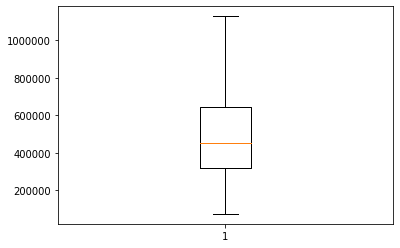

In [6]:
# it is a good idea to visualize the data before bulding the regression model.
# Visualize the distribution of the data

plt.boxplot(house_data['price'], 0, '')
plt.show()

In [8]:
# feature selection, these are dropped since they will not help in determining the price of the house
house_data = house_data.drop(['id', 'date', 'lat', 'long'], axis=1)

In [18]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,440000.0,3,2.5,1390,4997,2.0,0,0,3,7,1390,0,2004,0,98065,2340,4125
1,273500.0,3,1.5,1560,8314,1.0,0,0,3,7,1560,0,1962,0,98031,1820,8925
2,335500.0,3,1.0,1370,6780,2.0,0,0,3,6,1370,0,1930,0,98125,1450,7214
3,542000.0,3,2.5,1990,15985,1.0,0,0,3,8,1540,450,1964,0,98007,2470,10125
4,499950.0,3,2.0,1360,2500,1.0,0,0,3,7,730,630,1986,0,98107,1630,5000


In [12]:
# shuffle the DF. Frac generates a sample form the dataset. reset_index will contain 0-n
house_data = house_data.sample(frac = 1).reset_index(drop=True)

In [16]:
house_data['grade'].unique() # shows the unique values in this column (feature). Grade 1-13

array([ 7,  6,  8,  9, 11, 10,  5, 12,  4,  1, 13,  3])

In [17]:
house_data['yr_built'].unique()

array([2004, 1962, 1930, 1964, 1986, 1997, 1929, 1952, 1998, 1916, 1999,
       2007, 1978, 1976, 2013, 2014, 1969, 1950, 2011, 1966, 1980, 1922,
       2005, 1981, 1921, 1975, 1983, 2012, 1993, 1974, 1988, 1977, 1979,
       1920, 1984, 1996, 2003, 2010, 1971, 1961, 1995, 1989, 2001, 1945,
       1919, 2002, 2008, 2006, 1927, 1925, 1912, 1965, 1958, 1956, 1967,
       1970, 1968, 1992, 1900, 1910, 1987, 1954, 1990, 1937, 1959, 1911,
       1960, 1994, 1908, 1951, 1972, 1903, 1948, 1963, 1940, 1923, 1924,
       1949, 1946, 1901, 1917, 1928, 1955, 1985, 1918, 1938, 2009, 1953,
       1973, 1907, 1926, 1943, 1991, 2015, 1902, 1944, 1957, 1913, 1947,
       1941, 1942, 1915, 1932, 1906, 1933, 1936, 1905, 2000, 1982, 1931,
       1904, 1939, 1914, 1909, 1935, 1934])

In [19]:
# looking for any NaN values in each column
house_data[house_data.isnull().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15


In [20]:
# Since there are no nan values I can continue
x = house_data.drop('price', axis=1)  # x is all the features but price
y = house_data['price']       # y is just the price

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [21]:
# set up the linear model
linear_model = LinearRegression()

# fit the model with the x, y train set 
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# model has been built, how well does it perform
# the value is not very good
linear_model.score(x_train, y_train)

0.6528321992158315

In [24]:
# Check coeficient of eac input.
# + positive effect
# - negative effect
linear_model.coef_

array([-3.77233737e+04,  4.28142580e+04,  1.09190985e+02, -4.90928366e-03,
        2.68970623e+04,  5.91014761e+05,  4.34141451e+04,  1.92622545e+04,
        1.19019396e+05,  5.12076720e+01,  5.79833129e+01, -3.51332769e+03,
        1.31501650e+01,  2.29063167e+01,  2.73850772e+01, -5.83422349e-01])

In [27]:
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()
print(coefficients)

bedrooms         -37723.373683
yr_built          -3513.327690
sqft_lot15           -0.583422
sqft_lot             -0.004909
yr_renovated         13.150165
zipcode              22.906317
sqft_living15        27.385077
sqft_above           51.207672
sqft_basement        57.983313
sqft_living         109.190985
condition         19262.254481
floors            26897.062304
bathrooms         42814.258007
view              43414.145101
grade            119019.396341
waterfront       591014.761365
dtype: float64


In [29]:
y_pred = linear_model.predict(x_test)
y_pred


array([ 371650.72853798,  595855.68227677, 1050933.9260121 , ...,
        849726.17173106,  177314.84045509,  295738.20504542])

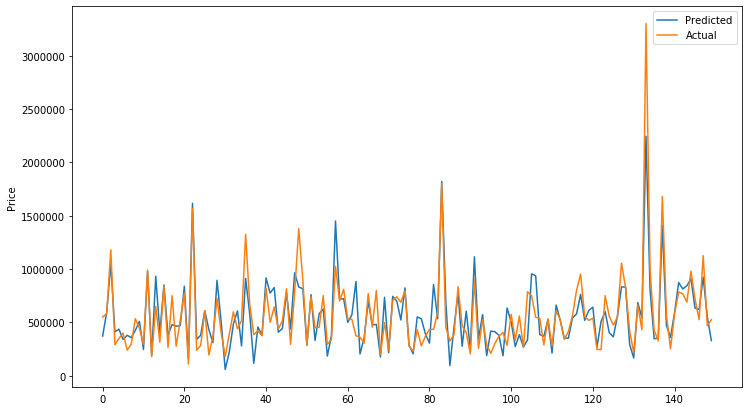

In [32]:
# visualize the test
plt.figure(figsize=(12, 7))

plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
r_square = linear_model.score(x_test, y_test)
r_square

0.656881598855007

In [33]:
# how far are my values
model_mse = mean_squared_error(y_pred, y_test)
model_mse

47699964294.74651

In [34]:
# now its in the same scale
math.sqrt(model_mse)

218403.21493683767

In [35]:
x = house_data.drop(['zipcode'], axis=1)
y = house_data[['bedrooms', 'condition', 'grade', 'zipcode']]

In [36]:
x_continuous = house_data[['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']]

In [37]:
x_categorical = house_data[['waterfront', 'view']]

In [38]:
# onehot encoding
x_zipcode = pd.get_dummies(house_data['zipcode'], columns = ['zipcode'])
x_zipcode.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 1))>

In [42]:
scaled_x = scaler.fit_transform(x_continuous)

In [46]:
columns = ['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
                             'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'condition', 'grade']

In [47]:
scaled_df = pd.DataFrame(data=scaled_x, columns = columns)

In [48]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.3125,0.083019,0.002712,0.4,0.120614,0.000000,0.904348,0.0,0.334022,0.003991,0.090909,0.5,0.500000
1,0.1875,0.095849,0.004721,0.0,0.139254,0.000000,0.539130,0.0,0.244536,0.009504,0.090909,0.5,0.500000
2,0.1250,0.081509,0.003792,0.4,0.118421,0.000000,0.260870,0.0,0.180864,0.007539,0.090909,0.5,0.416667
3,0.3125,0.128302,0.009368,0.0,0.137061,0.093361,0.556522,0.0,0.356393,0.010883,0.090909,0.5,0.583333
4,0.2500,0.080755,0.001199,0.0,0.048246,0.130705,0.747826,0.0,0.211840,0.004996,0.090909,0.5,0.500000


In [49]:
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [52]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.3125,0.083019,0.002712,0.4,0.120614,0.000000,0.904348,0.0,0.334022,0.003991,...,0,0,0,0,0,0,0,0,0,0
1,0.1875,0.095849,0.004721,0.0,0.139254,0.000000,0.539130,0.0,0.244536,0.009504,...,0,0,0,0,0,0,0,0,0,0
2,0.1250,0.081509,0.003792,0.4,0.118421,0.000000,0.260870,0.0,0.180864,0.007539,...,0,0,0,0,0,0,0,0,0,0
3,0.3125,0.128302,0.009368,0.0,0.137061,0.093361,0.556522,0.0,0.356393,0.010883,...,0,0,0,0,0,0,0,0,0,0
4,0.2500,0.080755,0.001199,0.0,0.048246,0.130705,0.747826,0.0,0.211840,0.004996,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x = scaled_df  # new scaled DF
y = house_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [55]:
# rebuild LM model
# set fit_intercept to False when working with onehot encoding data
# if LRM tries to fit data we will avoid co-linearity problems due to onehot
linear_model = LinearRegression(fit_intercept=False) 
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [56]:
linear_model.score(x_train, y_train)

0.8090022127629101

In [57]:
# the r square value is much better than before, 0.65. 
# scalling and encoding has improved the model

In [58]:
linear_model.coef_

array([ 1.81217200e+05, -9.43974155e+17,  3.66918707e+05, -1.14297320e+05,
        6.49739192e+17,  3.43392862e+17, -7.60764419e+04,  3.97664116e+04,
        7.68823073e+04, -1.20024000e+05, -8.38080000e+05,  9.74720000e+04,
        6.77504000e+05,  6.73992000e+05,  5.42400000e+04, -3.65496000e+05,
       -3.34592000e+05, -3.83148000e+05,  4.12768000e+05, -6.26880000e+04,
       -1.01152000e+05, -1.18524000e+05, -1.24432000e+05, -2.93520000e+05,
       -2.44792000e+05, -2.65406000e+05, -2.69198000e+05, -3.75104000e+05,
       -4.05568000e+05, -2.09334000e+05, -1.90800000e+05, -2.46920000e+05,
       -1.51624000e+05, -3.60620000e+05, -3.48658000e+05, -3.58628000e+05,
        5.60000000e+02, -1.64632000e+05, -3.39712000e+05,  9.59776000e+05,
        1.51616000e+05, -3.62688000e+05, -2.68514000e+05, -1.38016000e+05,
       -1.72944000e+05, -3.16292000e+05, -2.64744000e+05, -3.38684000e+05,
       -2.82488000e+05, -2.87200000e+05, -3.85032000e+05, -2.16864000e+05,
       -1.95264000e+05, -

In [59]:
# there are less coefficients this time
coefficients = pd.Series(linear_model.coef_, x_train.columns).sort_values()

In [60]:
print(coefficients)

sqft_living     -9.439742e+17
bedrooms        -8.380800e+05
98023           -4.055680e+05
98092           -4.042320e+05
98070           -3.850320e+05
                     ...     
waterfront       6.739920e+05
grade            6.775040e+05
98039            9.597760e+05
sqft_basement    3.433929e+17
sqft_above       6.497392e+17
Length: 85, dtype: float64


In [61]:
# bedrooms is still negatively correlated
# zip codes also drive the prices down or up depending on the zon


In [62]:
y_pred = linear_model.predict(x_test)

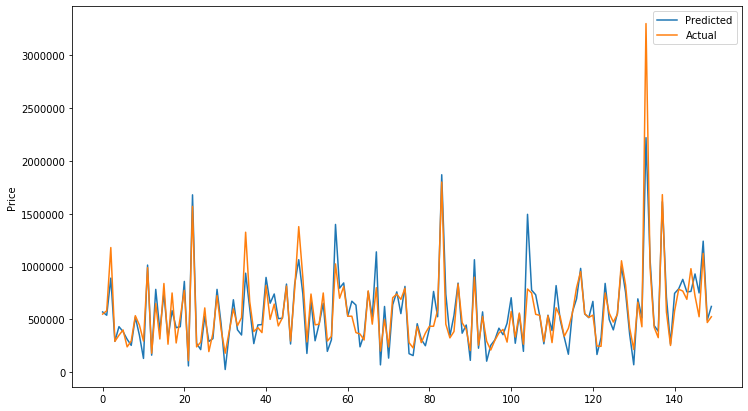

In [63]:
plt.figure(figsize=(12,7))
plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
r_square = linear_model.score(x_test, y_test)
r_square

0.8037047025334545

In [65]:
model_mse = mean_squared_error(y_pred, y_test)
model_mse

27288768684.907074

In [66]:
math.sqrt(model_mse)

165193.12541660768

In [67]:
# Lessons learned:
# Its important to preprocess the features before building the machine learning estimator to give better results. 

In [68]:
# Standardizing Continuous data
scaler = StandardScaler()

In [69]:
scaler
scaler.get_params

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [70]:
# using the StandardScaler
scaled_x = scaler.fit_transform(x_continuous) # scaled values is an np array

In [71]:
scaled_df = pd.DataFrame(data=scaled_x, columns=columns)  # zero mean and STD = 1

In [73]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms,condition,grade
0,0.500221,-0.751181,-0.244087,0.936506,-0.481106,-0.658681,1.123316,-0.210128,0.515699,-0.316569,-0.398737,-0.629187,-0.558836
1,-0.798235,-0.566081,-0.164004,-0.915427,-0.275810,-0.658681,-0.306581,-0.210128,-0.243009,-0.140768,-0.398737,-0.629187,-0.558836
2,-1.447464,-0.772958,-0.201040,0.936506,-0.505259,-0.658681,-1.396027,-0.210128,-0.782859,-0.203433,-0.398737,-0.629187,-1.409587
3,0.500221,-0.097885,0.021199,-0.915427,-0.299963,0.358119,-0.238491,-0.210128,0.705376,-0.096817,-0.398737,-0.629187,0.291916
4,-0.149007,-0.783846,-0.304372,-0.915427,-1.278139,0.764839,0.510503,-0.210128,-0.520229,-0.284522,-0.398737,-0.629187,-0.558836


In [74]:
scaled_df = pd.concat([scaled_df, x_categorical, x_zipcode], axis=1)

In [76]:
scaled_df.head()

,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.500221,-0.751181,-0.244087,0.936506,-0.481106,-0.658681,1.123316,-0.210128,0.515699,-0.316569,...,0,0,0,0,0,0,0,0,0,0
1,-0.798235,-0.566081,-0.164004,-0.915427,-0.275810,-0.658681,-0.306581,-0.210128,-0.243009,-0.140768,...,0,0,0,0,0,0,0,0,0,0
2,-1.447464,-0.772958,-0.201040,0.936506,-0.505259,-0.658681,-1.396027,-0.210128,-0.782859,-0.203433,...,0,0,0,0,0,0,0,0,0,0
3,0.500221,-0.097885,0.021199,-0.915427,-0.299963,0.358119,-0.238491,-0.210128,0.705376,-0.096817,...,0,0,0,0,0,0,0,0,0,0
4,-0.149007,-0.783846,-0.304372,-0.915427,-1.278139,0.764839,0.510503,-0.210128,-0.520229,-0.284522,...,0,0,0,0,0,0,0,0,0,0


In [77]:
x= scaled_df
y = house_data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [78]:
# Redifine the LG model
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [79]:
linear_model.score(x_train, y_train)

0.808999891153078

In [80]:
y_pred = linear_model.predict(x_test)
r_square = linear_model.score(x_test, y_test)
r_square

0.8037087707920982

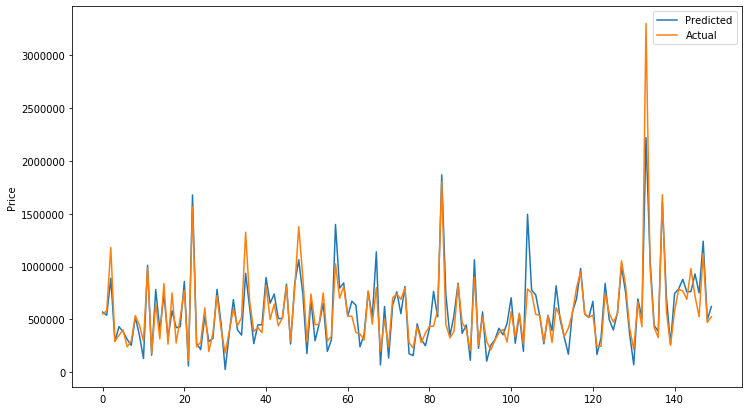

In [81]:
plt.figure(figsize=(12,7))
plt.plot(y_pred[:150,], label='Predicted')
plt.plot(y_test[:150,].values, label='Actual')

plt.ylabel('Price')
plt.legend()
plt.show()

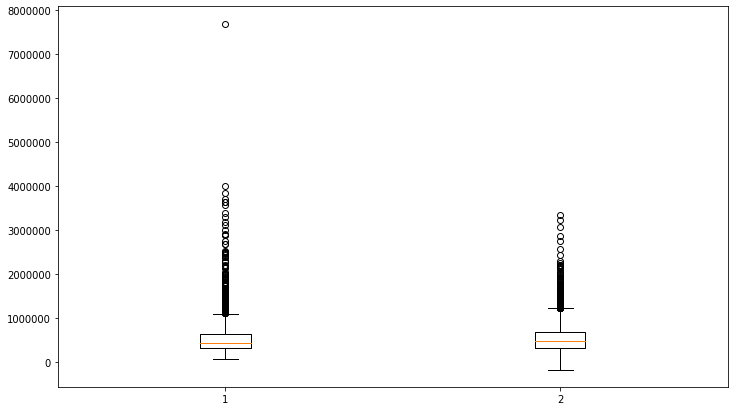

In [82]:
plt.figure(figsize=(12,7))
plt.boxplot([y_test, y_pred])
plt.show()

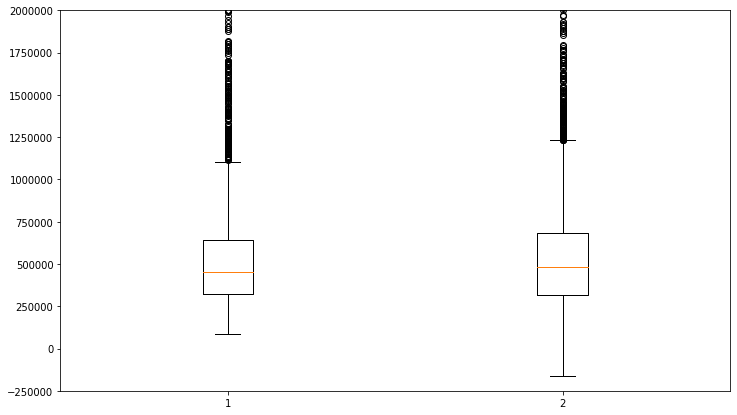

In [83]:
# it is dificult to predict outliers in any field

plt.figure(figsize=(12,7))
plt.ylim(bottom = -250000, top = 2000000)
plt.boxplot([y_test, y_pred])
plt.show()

In [ ]:
# Standard characteristics of the StandardScalers
# values will have a zero mean and a variance and std of 1.
# Z-score

In [ ]:
# practice onehot encoding with MattressSize feature ['Full', 'Twin', Queen', 'King']
# one-hot encoding instead of label encoding when you have more than two features
x_mattSize = pd.get_dummies(mattress['size'])

In [ ]:
# Recall two matrics that were used to evaluate regression model
# Mean Squared Error RMSE - most widely used, the lower the better

# r_squared score -- the higher the better. If more features are added the r_square may increase even if the 
# new features dont improve the model. In this case use adjusted r^2, calculates the score by taking into account
# the number of features. 
# r^2 measures how well the linear model captures the variance in the data

# Mean Absolute error

In [ ]:
# Enumerate the details conveyed in a Boxplot
# Lower edge: 1st quartile at 25% 
# upper edge: 3td quartile at 75%
# horizontal line: median vale for distribution
# whiskers: IQR: 3Q + 1.5IQR. 
#                1Q - 1.5IQR
# Outliers